In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.stats.weightstats as sm
import seaborn as sns

# **Reading csv file**

In [ ]:
property_data = pd.read_csv('/content/drive/MyDrive/Property.csv',sep=';')

# **What is in data?**

In [ ]:
property_data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,07-17-2019,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,10-06-2018,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,07-03-2019,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,04-04-2019,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,04-04-2019,NaN,NaN


# **Dimension of Dataset**

In [ ]:
print("There are: \n{} columns\n{} rows".format(property_data.shape[1],property_data.shape[0]))

There are: 
17 columns
191393 rows


# **Features(Columns) in dataset**

In [ ]:
property_data.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent'],
      dtype='object')

# **Data Quality**

In [ ]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    191393 non-null  int64  
 1   location_id    191393 non-null  int64  
 2   page_url       191393 non-null  object 
 3   property_type  191393 non-null  object 
 4   price          191393 non-null  int64  
 5   location       191393 non-null  object 
 6   city           191393 non-null  object 
 7   province_name  191393 non-null  object 
 8   latitude       191393 non-null  float64
 9   longitude      191393 non-null  float64
 10  baths          191393 non-null  int64  
 11  area           191393 non-null  object 
 12  purpose        191393 non-null  object 
 13  bedrooms       191393 non-null  int64  
 14  date_added     191393 non-null  object 
 15  agency         144014 non-null  object 
 16  agent          144013 non-null  object 
dtypes: float64(2), int64(5), obje

# **Checking Null Values**

In [ ]:
property_data.isnull().sum()

,0
property_id,0
location_id,0
page_url,0
property_type,0
price,0
location,0
city,0
province_name,0
latitude,0
longitude,0


In [ ]:
property_data.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms
count,1.913930e+05,191393.000000,1.913930e+05,191393.000000,191393.000000,191393.000000,191393.000000
mean,1.573170e+07,4224.580350,1.644655e+07,30.104593,71.572992,2.865956,3.171516
std,2.215249e+06,3719.125201,3.416412e+07,3.645941,3.080463,2.435332,1.952403
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000
25%,1.511867e+07,1057.000000,8.000000e+04,24.972287,67.152597,0.000000,2.000000
50%,1.676385e+07,3233.000000,7.300000e+06,31.463563,73.077743,3.000000,3.000000
75%,1.715282e+07,7182.000000,1.800000e+07,33.550869,74.228218,4.000000,4.000000
max,1.769386e+07,14246.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000


In [ ]:
print(f"{property_data.agent.isnull().sum()} nulls found in agent columns")
print(f"{property_data.agency.isnull().sum()} nulls found in agency columns")

47380 nulls found in agent columns
47379 nulls found in agency columns


# **Summary**


1.   There are 47380 and 47379 nulls found in agent and agency columns respectively.

2.   All the features contains proper data types except following:

    a. **price** that is currently integer but should be float.

    b. **area** that is currently object (Marla & Kanal) but should be float and in common unit so we can convert it to square-yards.

    c. **date_added** is currently object but should be date.

3.  Conversion of these features is neceassary for proper statistical and time based analysis.

4. Lastly, few columns are not required like **property_id**	- **location_id**	- **page_url** as they have less impact on remain features.



# **Data Transformation**

## **1. Removing Extra Features**

In [ ]:
property_data.drop(['property_id','location_id','page_url'],axis=1,inplace=True)

In [ ]:
property_data.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,07-17-2019,Real Biz International,Usama Khan
1,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,10-06-2018,Khan Estate,mohsinkhan and B
2,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,07-03-2019,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,04-04-2019,NaN,NaN
4,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,04-04-2019,NaN,NaN


## **2. Converting Price into float**

In [ ]:
property_data['price'] = property_data['price'].astype(float)

## **3. Converting Area from "Marla" and "Kanal" to "Square yards"**

In [ ]:
# Defining a custom function to convert values
def convert_area(area):
  if 'Marla' in area:
    return round(float(area.replace(',','').replace('Marla',''))*30.25,2)
  elif 'Kanal' in area:
    return round(float(area.replace(',','').replace('Kanal',''))*605,2)
  else:
    return round(float(area.replace(',',''),2))

In [ ]:
property_data['area'] = property_data['area'].apply(convert_area)

## **4. Convert Date object to datetime**

In [ ]:
property_data['date_added'] = pd.to_datetime(property_data['date_added'])

## **5. Adding year column using date_added**

In [ ]:
property_data['year'] = property_data['date_added'].dt.year

## **6. Filling Nulls with Forward Fill Method by propogating previous values**

In [ ]:
property_data['agent'].ffill(inplace=True)
property_data['agency'].ffill(inplace=True)

<ipython-input-19-9cf91ac8db32>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  property_data['agent'].ffill(inplace=True)
<ipython-input-19-9cf91ac8db32>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
property_data.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,year
0,House,220000000.0,Model Town,Lahore,Punjab,31.483869,74.325686,0,3630.00,For Sale,0,2019-07-17,Real Biz International,Usama Khan,2019
1,House,40000000.0,Multan Road,Lahore,Punjab,31.431593,74.179980,5,605.00,For Sale,5,2018-10-06,Khan Estate,mohsinkhan and B,2018
2,House,9500000.0,Eden,Lahore,Punjab,31.499348,74.416959,0,272.25,For Sale,3,2019-07-03,Shahum Estate 2,"Babar Hameed, Raja Omar",2019
3,House,125000000.0,Gulberg,Lahore,Punjab,31.522069,74.355512,7,605.00,For Sale,8,2019-04-04,Shahum Estate 2,"Babar Hameed, Raja Omar",2019
4,House,21000000.0,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,332.75,For Sale,6,2019-04-04,Shahum Estate 2,"Babar Hameed, Raja Omar",2019


## 7. Checking if dataset contains outliers

#### **Where we can see outliers?**
#### We can see outliers in numeric features so we will be catering outliers for:
#### 1. Price
#### 2. Area
#### 3. Bedrooms
#### 4. Bathrooms

## Visualizing Outliers

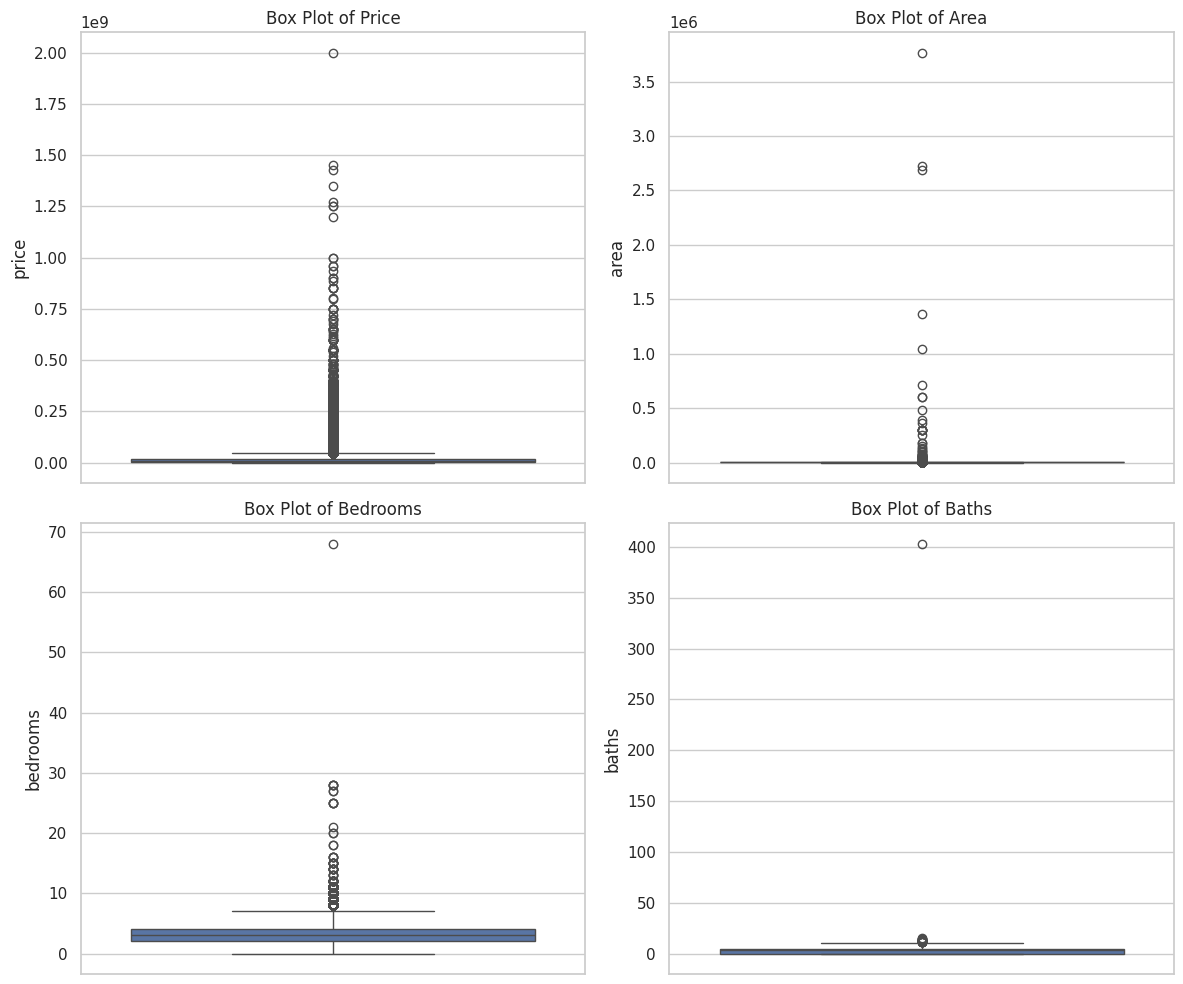

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(ax=axes[0, 0], data=property_data, y='price')
axes[0, 0].set_title('Box Plot of Price')

sns.boxplot(ax=axes[0, 1], data=property_data, y='area')
axes[0, 1].set_title('Box Plot of Area')

sns.boxplot(ax=axes[1, 0], data=property_data, y='bedrooms')
axes[1, 0].set_title('Box Plot of Bedrooms')

sns.boxplot(ax=axes[1, 1], data=property_data, y='baths')
axes[1, 1].set_title('Box Plot of Baths')

plt.tight_layout()
plt.show()

In [ ]:
# Here i defined a generalized function to find lower and upper bounds and returns a clipped groupped dataset
def detecting_and_clipping_outliers_iqr(frame, column):
    Q1 = frame[column].quantile(0.25)
    Q3 = frame[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    frame[column] = frame[column].clip(lower=lower_bound,upper=upper_bound)
    return frame

In [ ]:
# Here i am grouping dataset based on city location and property type to to deal with outliers on granular level
grouped_data = property_data.groupby(['city','location','property_type'])

In [ ]:
# Clipping Price Outliers
grouped_data = grouped_data.apply(detecting_and_clipping_outliers_iqr, column='price')

<ipython-input-24-d5bad771fa0a>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data = grouped_data.apply(detecting_and_clipping_outliers_iqr, column='price')


In [ ]:
# overwriting the dataframe with clipped prices data
# Also i used property_data.columns to extract same relevant columns and avoid adding columns added for groub indexing
property_data = grouped_data.reset_index(drop=True)[property_data.columns]

## Repeating similar steps for area, bedrooms and bathrooms

In [ ]:
# For area
grouped_data = property_data.groupby(['city','location','property_type'])
grouped_data = grouped_data.apply(detecting_and_clipping_outliers_iqr, column='area')
property_data = grouped_data.reset_index(drop=True)[property_data.columns]

<ipython-input-26-3abd17e641ee>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data = grouped_data.apply(detecting_and_clipping_outliers_iqr, column='area')


In [ ]:
# For bedrooms
grouped_data = property_data.groupby(['city','location','property_type'])
grouped_data = grouped_data.apply(detecting_and_clipping_outliers_iqr, column='bedrooms')
property_data = grouped_data.reset_index(drop=True)[property_data.columns]

<ipython-input-27-f2bdc66df16f>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data = grouped_data.apply(detecting_and_clipping_outliers_iqr, column='bedrooms')


In [ ]:
# For bathrooms
grouped_data = property_data.groupby(['city','location','property_type'])
grouped_data = grouped_data.apply(detecting_and_clipping_outliers_iqr, column='baths')
property_data = grouped_data.reset_index(drop=True)[property_data.columns]

<ipython-input-28-301d55251838>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data = grouped_data.apply(detecting_and_clipping_outliers_iqr, column='baths')


## Visualizing again to see final data status within IQR

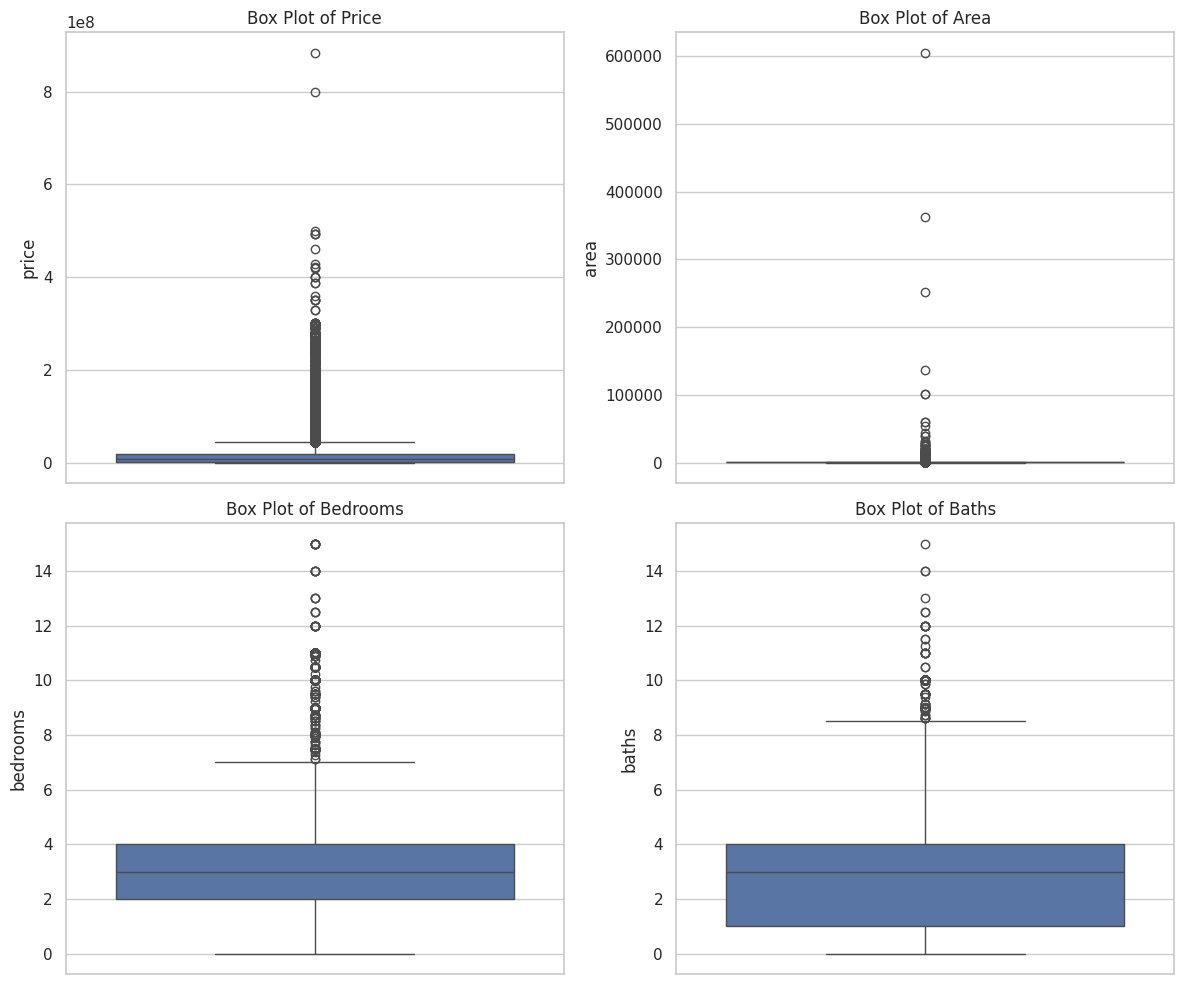

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(ax=axes[0, 0], data=property_data, y='price')
axes[0, 0].set_title('Box Plot of Price')

sns.boxplot(ax=axes[0, 1], data=property_data, y='area')
axes[0, 1].set_title('Box Plot of Area')

sns.boxplot(ax=axes[1, 0], data=property_data, y='bedrooms')
axes[1, 0].set_title('Box Plot of Bedrooms')

sns.boxplot(ax=axes[1, 1], data=property_data, y='baths')
axes[1, 1].set_title('Box Plot of Baths')

plt.tight_layout()
plt.show()


## **Checking data information again**

In [ ]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   property_type  191393 non-null  object        
 1   price          191393 non-null  float64       
 2   location       191393 non-null  object        
 3   city           191393 non-null  object        
 4   province_name  191393 non-null  object        
 5   latitude       191393 non-null  float64       
 6   longitude      191393 non-null  float64       
 7   baths          191393 non-null  float64       
 8   area           191393 non-null  float64       
 9   purpose        191393 non-null  object        
 10  bedrooms       191393 non-null  float64       
 11  date_added     191393 non-null  datetime64[ns]
 12  agency         191393 non-null  object        
 13  agent          191393 non-null  object        
 14  year           191393 non-null  int32         
dtype

# **Data Transformation Summary**
1. All the desired features have been converted into relevant datatypes.
2. Nulls values have been catered without drop dropping rows.
3. All unnecessary columns have been dropped.
4. All outliers in price, area,bedrooms and bathrooms have been catered based on city-location-property


# **Exploratory Data Analysis**

# **1. Find percentage of data records of each city in dataset.**

In [ ]:
property_counts_each_city = property_data.groupby('city').agg(count=('city','count'))
property_counts_each_city['percentage'] = property_counts_each_city['count'] / property_counts_each_city['count'].sum() * 100
print(property_counts_each_city)

            count  percentage
city                         
Faisalabad   9080    4.744165
Islamabad   40195   21.001291
Karachi     60484   31.601992
Lahore      58736   30.688688
Rawalpindi  22898   11.963865


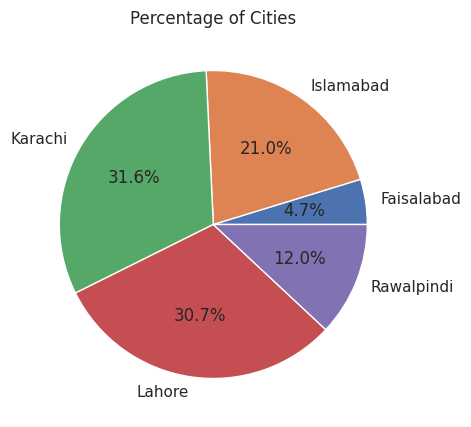

In [ ]:
property_data.groupby('city').size().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title('Percentage of Cities')
plt.show()

# **2. How does the average property price vary across different property types in each city?**

In [ ]:
mean_details = property_data.groupby(['city','property_type'])['price'].mean()

In [ ]:
mean_details

city        property_type
Faisalabad  Farm House       4.380000e+07
            Flat             1.614592e+06
            House            8.615516e+06
            Lower Portion    4.008061e+04
            Penthouse        4.436000e+06
            Room             1.039369e+05
            Upper Portion    3.089215e+04
Islamabad   Farm House       7.607039e+07
            Flat             4.948451e+06
            House            1.617662e+07
            Lower Portion    5.366522e+04
            Penthouse        1.473486e+07
            Room             8.446899e+04
            Upper Portion    5.645564e+04
Karachi     Farm House       3.060426e+07
            Flat             9.213161e+06
            House            3.440537e+07
            Lower Portion    3.890003e+06
            Penthouse        1.694700e+07
            Room             6.151279e+05
            Upper Portion    5.420591e+06
Lahore      Farm House       4.565991e+07
            Flat             5.022749e+06
            House            2.053442e+07
            Lower Portion    1.327021e+05
            Penthouse        1.605421e+07
            Room             8.925263e+04
            Upper Portion    9.904984e+04
Rawalpindi  Farm House       1.626647e+07
            Flat             2.953636e+06
            House            1.117145e+07
            Lower Portion    3.093566e+04
            Penthouse        9.724087e+06
            Room             8.621167e+03
            Upper Portion    3.682585e+04
Name: price, dtype: float64

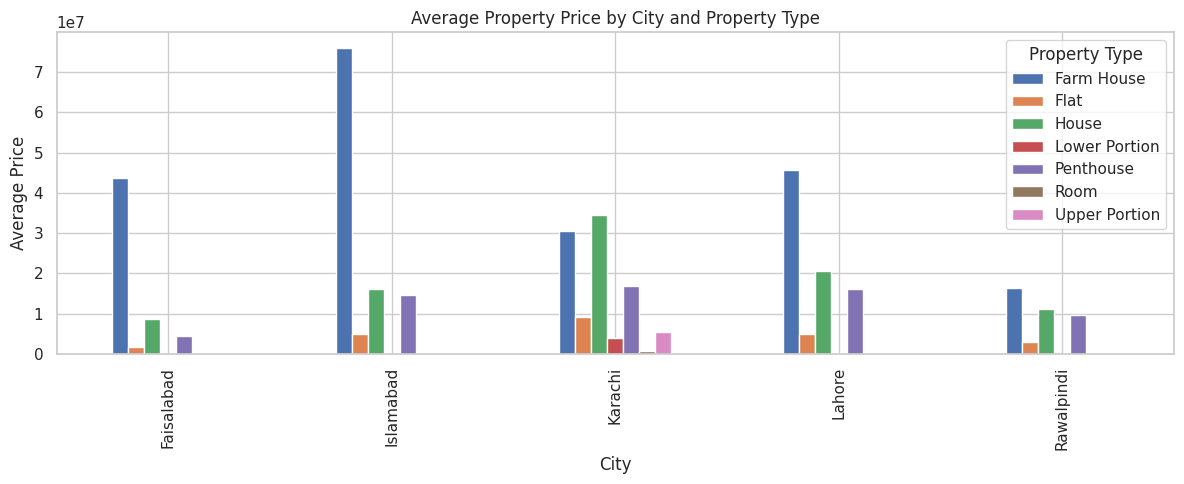

In [ ]:
average_price_by_city_property_type = mean_details.unstack()
average_price_by_city_property_type.plot(kind='bar', figsize=(12, 5))
plt.title('Average Property Price by City and Property Type')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()

# **3. Find the best agent of each city**

In [ ]:
grouped  = property_data.groupby(['city', 'agent'])['price'].sum().reset_index()
grouped_sorted = grouped.sort_values(by=['city','price'], ascending=False)
bestagent_by_city = grouped_sorted.groupby('city').head(1)
bestagent_by_city

,city,agent,price
12697,Rawalpindi,Muhammad Nasir,5.882786e+09
8002,Lahore,Azam Ali,1.818450e+10
3341,Karachi,Abdul Latif Shah,2.132218e+10
1942,Islamabad,Mr. Imran Akhtar / Mr Sardar Danish,6.666300e+09
63,Faisalabad,"Azeem Amjad, Amjad Hussain Shah",3.501546e+09


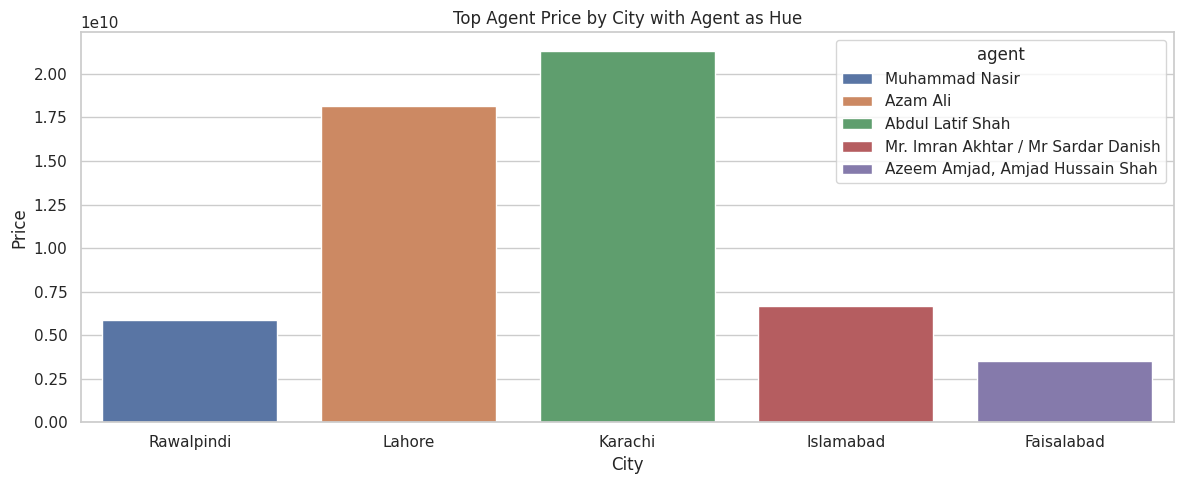

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data=bestagent_by_city, x='city', y='price', hue='agent')

# Add title and labels
plt.title('Top Agent Price by City with Agent as Hue')
plt.xlabel('City')
plt.ylabel('Price')

# Show plot
plt.tight_layout()
plt.show()

# **4. Find for each city the  number of properties listed for sale or rent?**

In [ ]:
grouped = property_data.groupby(['city','purpose']).agg(Total=('purpose','count')).sort_values(by='Total',ascending=False)
grouped

Total
city       purpose        
Karachi    For Sale  46669
Lahore     For Sale  45218
Islamabad  For Rent  22976
           For Sale  17219
Karachi    For Rent  13815
Lahore     For Rent  13518
Rawalpindi For Sale  12720
           For Rent  10178
Faisalabad For Sale   5192
           For Rent   3888

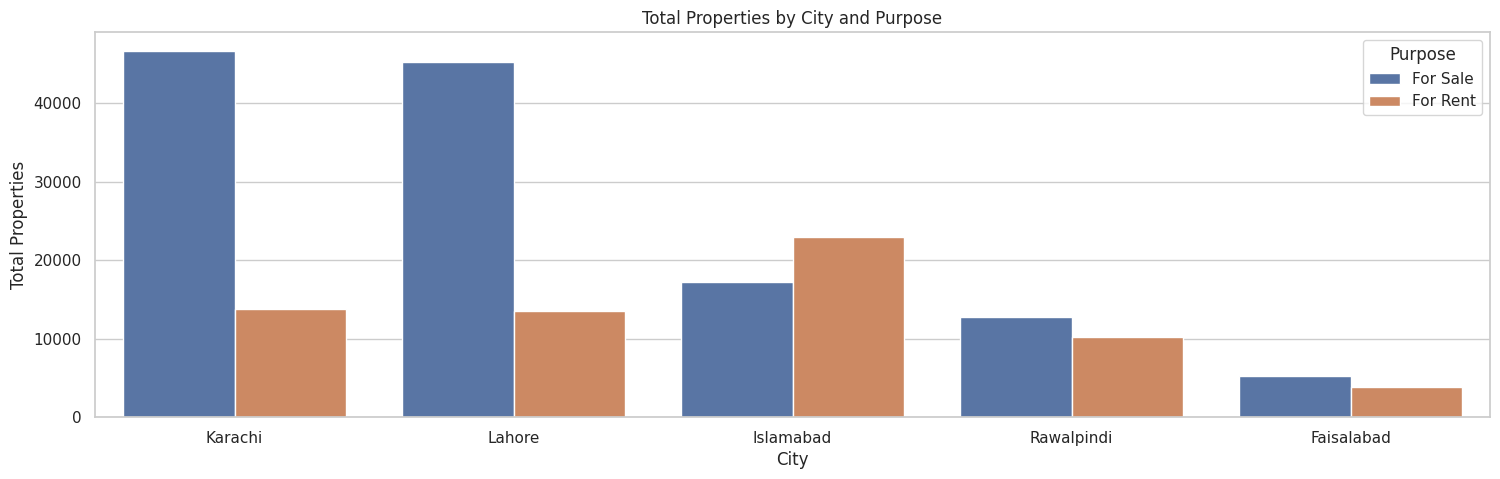

In [ ]:
plt.figure(figsize=(18, 5))
sns.barplot(data=grouped, x='city', y='Total', hue='purpose')
plt.title('Total Properties by City and Purpose')
plt.xlabel('City')
plt.ylabel('Total Properties')
plt.legend(title='Purpose')
plt.show()

# **5. What is the relationship between the number of bedrooms and the price of properties across different provinces?**

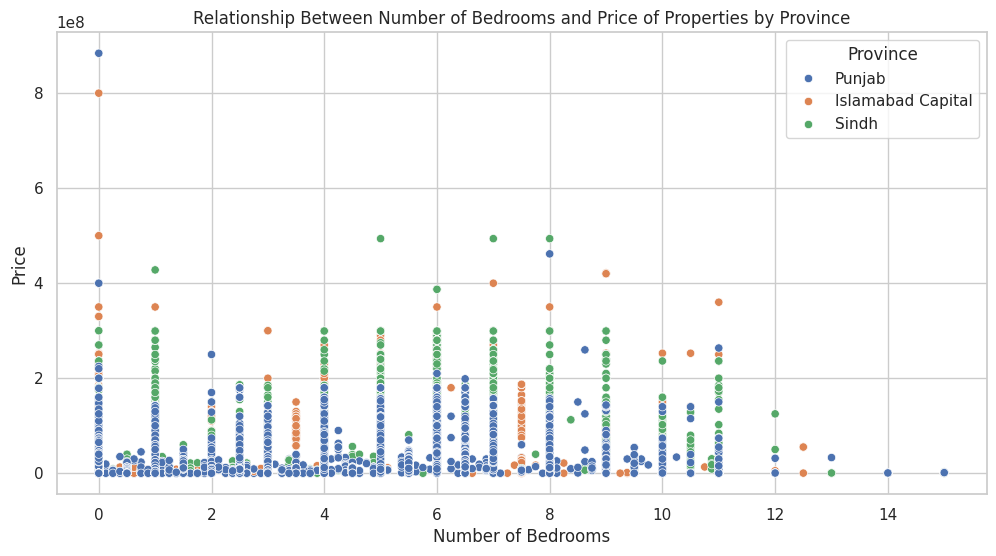

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=property_data, x='bedrooms', y='price', hue='province_name')
plt.title('Relationship Between Number of Bedrooms and Price of Properties by Province')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend(title='Province', loc='upper right')
plt.show()

# **6. What is the average area and price of Houses in Karachi having exactly 3 number of bathrooms in properties across different cities?**

In [ ]:
target_houses = property_data[(property_data['property_type'] == 'House') & (property_data['baths'] == 3) & (property_data['city'] == 'Karachi')]
average_area = target_houses['area'].mean()
average_price = target_houses['price'].mean()
print(f"Average Area: {round(average_area,2)} sq-yards")
print(f"Average Price: Rs. {round(average_price/1e6,2)} Millions")

Average Area: 235.14 sq-yards
Average Price: Rs. 15.16 Millions


# **7. What is the average number of bedrooms and price of Flats in Lahore with at least 2 bathrooms?**

In [ ]:
target_flats = property_data[(property_data['city']=='Lahore') & (property_data['property_type']=='Flat') & (property_data['baths'] >= 2)]
average_bedrooms = target_flats['bedrooms'].mean()
average_price = target_flats['price'].mean()
print(f"Average Number of Bedrooms: {round(average_bedrooms)}")
print(f"Average Price: Rs. {round(average_price/1e6,2)} Millions")

Average Number of Bedrooms: 3
Average Price: Rs. 6.93 Millions


# **8. What is the percentage of different properties set for rent in Karachi in 2019?**

In [ ]:
properties_rent_karachi_2019 = property_data[(property_data['city'] == 'Karachi') & (property_data['year'] == 2019) & (property_data['purpose'] == 'For Rent')]

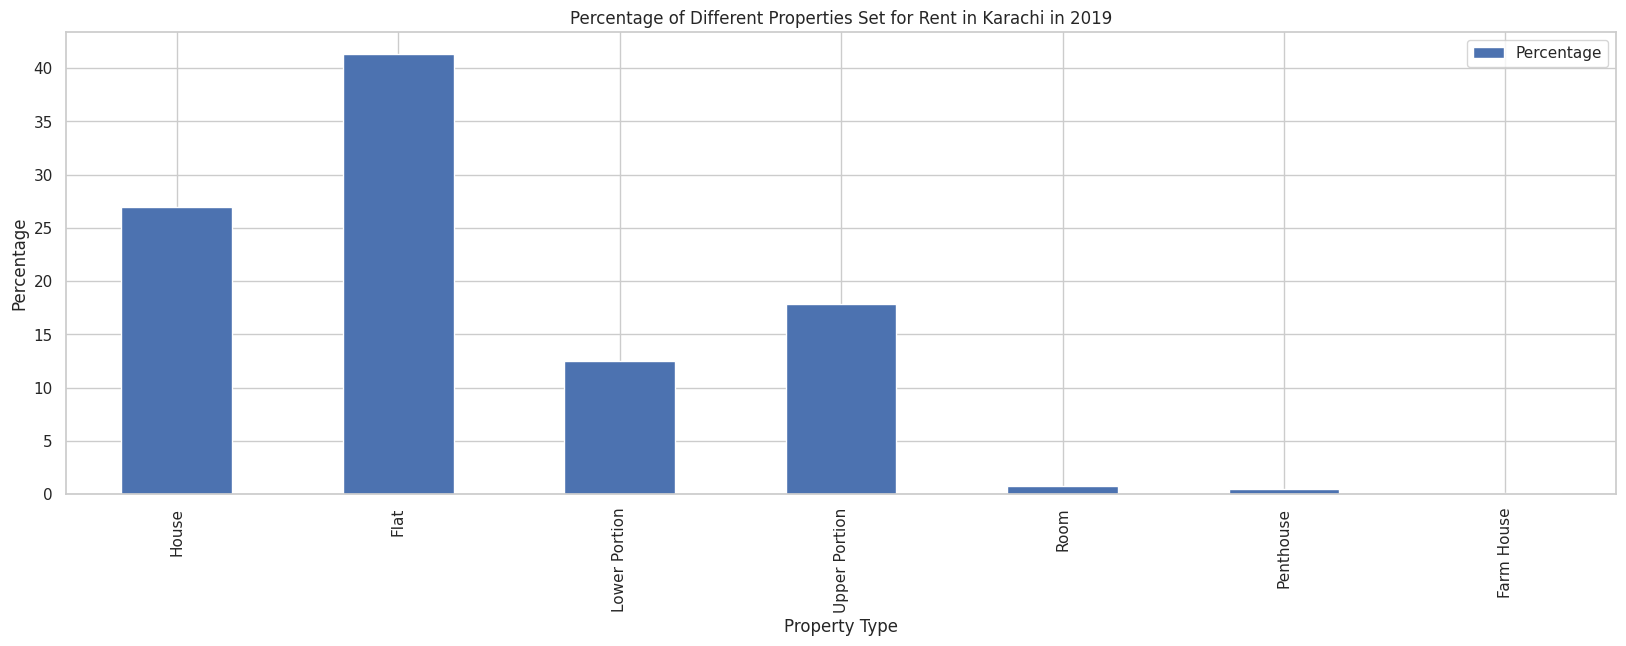

In [ ]:
prop_details = {}

for prop_type in properties_rent_karachi_2019['property_type'].unique():
    count = properties_rent_karachi_2019[properties_rent_karachi_2019['property_type'] == prop_type].shape[0]
    percentage = (count / properties_rent_karachi_2019.shape[0]) * 100
    prop_details[prop_type] = percentage

property_type_df = pd.DataFrame(list(prop_details.items()), columns=['Property Type', 'Percentage'])
property_type_df.plot(kind='bar', x='Property Type', y='Percentage', figsize=(20, 6))
plt.title('Percentage of Different Properties Set for Rent in Karachi in 2019')
plt.xlabel('Property Type')
plt.ylabel('Percentage')
plt.show()

# **9. What percentage increase in avg price of lower portions for sale in Karachi from 2018 to 2019**

In [ ]:
lowerportions_for_sale_in_Karachi = property_data[(property_data['city'] == 'Karachi') & (property_data['property_type'] == 'Lower Portion') & (property_data['purpose']=='For Sale')]
avg_price_in_2018 = lowerportions_for_sale_in_Karachi[lowerportions_for_sale_in_Karachi['year'] == 2018]['price'].mean()
avg_price_in_2019 = lowerportions_for_sale_in_Karachi[lowerportions_for_sale_in_Karachi['year'] == 2019]['price'].mean()

In [ ]:
percentage_increase = ((avg_price_in_2019 - avg_price_in_2018) / avg_price_in_2018) * 100
print(f"Percentage increase in avg price of lower portions for sale in Karachi from 2018 to 2019: {round(percentage_increase,2)}%")

Percentage increase in avg price of lower portions for sale in Karachi from 2018 to 2019: 12.83%


# **10. Perform a z-test to check following:**

I want to test if the average houses price in Lahore's location 'West Wood Housing Society' is different from the Lahore's average house price.

Z-statistic: 1.5893880810004992
P-value: 0.11197280384314909
Accept null hypothesis: There is no significant difference between the average house price of 'West Wood Housing Society' and Lahore.


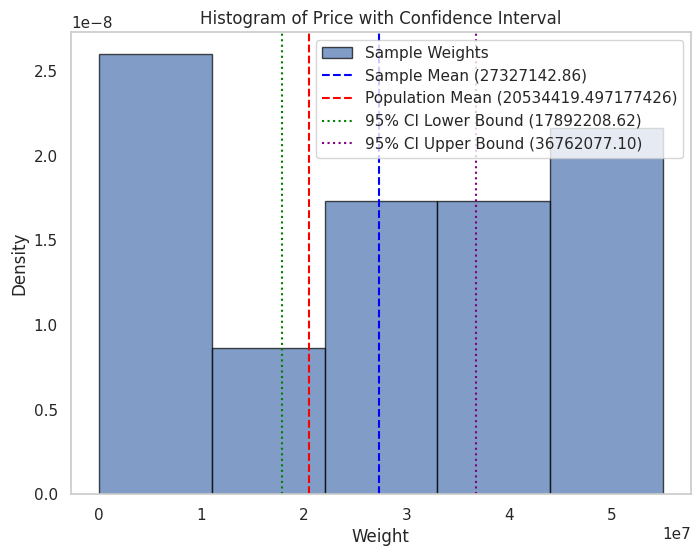

In [ ]:
population = np.array(property_data[(property_data['city']=='Lahore') & (property_data['property_type']=='House')]['price'])

sample = np.array(property_data[(property_data['city']=='Lahore') &(property_data['location']=='West Wood Housing Society') & (property_data['property_type']=='House')]['price'])

population_mean = population.mean()

population_std = population.std()

z_stat, p_value = sm.ztest(sample, value=population_mean, alternative='two-sided')

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")


alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average house price of 'West Wood Housing Society' is significantly different from the lahore's average house price.")
else:
    print("Accept null hypothesis: There is no significant difference between the average house price of 'West Wood Housing Society' and Lahore.")

sample_mean = np.mean(sample)
n = len(sample)

standard_error = population_std / np.sqrt(n)

z_critical = 1.96

ci_lower = sample_mean - z_critical * standard_error
ci_upper = sample_mean + z_critical * standard_error

# Visualization
plt.figure(figsize=(8, 6))
plt.hist(sample, bins=5, edgecolor='black', alpha=0.7, density=True, label='Sample Weights')
plt.axvline(x=sample_mean, color='blue', linestyle='dashed', linewidth=1.5, label=f'Sample Mean ({sample_mean:.2f})')
plt.axvline(x=population_mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Population Mean ({population_mean})')
plt.axvline(x=ci_lower, color='green', linestyle='dotted', linewidth=1.5, label=f'95% CI Lower Bound ({ci_lower:.2f})')
plt.axvline(x=ci_upper, color='purple', linestyle='dotted', linewidth=1.5, label=f'95% CI Upper Bound ({ci_upper:.2f})')

plt.title('Histogram of Price with Confidence Interval')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.legend()
plt.grid(False)
plt.show()